## Pytorch 入门

Pytorch 使用动态图， 每一步都会重新计算，而然后作为输入，传递给下一步，比较适合研究
TensorFlow 使用静态图，相当于定义好了计算图，然后再输入数据，计算图就会动态的计算出结果，以后的版本也兼容动态图，1，2版本完全不兼容，更适合工程实践


In [6]:
# GPU加速
import torch
import time

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.mps.is_available())
a = torch.randn(10000, 1000)
b = torch.randn(1000, 2000)

t0 = time.time()
c = torch.matmul(a, b)
t1 = time.time()
print(a.device, t1 - t0, c.norm(2))

device = torch.device('mps')  # for apple silicon mps, for nvidia cuda
a = a.to(device)
b = b.to(device)

t0 = time.time()
c = torch.matmul(a, b)
t2 = time.time()
print(a.device, t2 - t0, c.norm(2))

t0 = time.time()
c = torch.matmul(a, b)
t2 = time.time()
print(a.device, t2 - t0, c.norm(2))

2.1.2
False
True
cpu 0.015101909637451172 tensor(141267.5000)
mps:0 0.0015189647674560547 tensor(141410.6094, device='mps:0')
mps:0 0.00012111663818359375 tensor(141410.6094, device='mps:0')


In [7]:
# 自动求导
# y = a^2x + bx + c
# dy/da = 2ax + b
# dy/db = x
# dy/dc = 1
import torch

from torch import autograd

x = torch.tensor(1.)
a = torch.tensor(1., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
c = torch.tensor(3., requires_grad=True)

y = a ** 2 * x + b * x + c
print('before', a.grad, b.grad, c.grad)
grads = autograd.grad(y, [a, b, c])
print('after', grads[0], grads[1], grads[2])

before None None None
after tensor(2.) tensor(1.) tensor(1.)


In [ ]:
# 常用网络层， 用来堆叠网络结构


## 回归问题

梯度下降算法
求导
极小值

### 梯度下降算法的定义

y = x^2
求y取最小值时，x的值
f(x)=x - y`/x` * a
也就是x-函数y的导数，乘以一个学习率，就是下一步的x值
学习率越小，越精确，但是越慢
学习率越大，越快，但是越不精确
eg:
set a = 0.2
set x = 5 # 随机设置一个x值，当前位置
step1: 5 - 0.2 * 2 * 5 = 3
step2: 3 - 0.2 * 2 * 3 = 1.2
step3: 1.2 - 0.2 * 2 * 1.2 = 0.48
step4: 0.48 - 0.2 * 2 * 0.48 = 0.192
step5: 0.192 - 0.2 * 2 * 0.192 = 0.0768
step6: 0.0768 - 0.2 * 2 * 0.0768 = 0.03072
step7: 0.03072 - 0.2 * 2 * 0.03072 = 0.012288
step8: 0.012288 - 0.2 * 2 * 0.012288 = 0.0049152
step9: 0.0049152 - 0.2 * 2 * 0.0049152 = 0.00196608
... 一直循环下去，直到x的值不变了，或者一直在一个值附近抖动，就是最小值了


In [26]:
# 梯度下降算法的实现(二次函数)
# y = x^2
# f(x) = x - y`/x` * a
# f(x) = x - 2x * a
x = 5
learning_rate = 0.2  # 如果过大会导致错过最优解或在最优解之间不断波动
pre_x = x
current_x = x
for i in range(1000):
    pre_x = current_x
    grad = 2 * x
    x = x - learning_rate * grad
    current_x = x
    y = x ** 2
    print(f"step= {i + 1}, x= {x:.30f}, 'y = {y:.40f}'")
    if abs(pre_x - current_x) < 0.1 ** 30:
        break
# closed form solution

step= 1, x= 3.000000000000000000000000000000, 'y = 9.0000000000000000000000000000000000000000'
step= 2, x= 1.799999999999999822364316059975, 'y = 3.2399999999999993249844010279048234224319'
step= 3, x= 1.079999999999999849009668650979, 'y = 1.1663999999999996592947582030319608747959'
step= 4, x= 0.647999999999999909405801190587, 'y = 0.4199039999999998884483431993430713191628'
step= 5, x= 0.388799999999999923439020221849, 'y = 0.1511654399999999287551588622591225430369'
step= 6, x= 0.233279999999999931858951640606, 'y = 0.0544195583999999704660766042252362240106'
step= 7, x= 0.139967999999999953564255861238, 'y = 0.0195910410239999860371185036456154193729'
step= 8, x= 0.083980799999999966587438393617, 'y = 0.0070527747686399940366119842849457199918'
step= 9, x= 0.050388479999999978564684255389, 'y = 0.0025389989167103979052220186218846720294'
step= 10, x= 0.030233087999999984363252991670, 'y = 0.0009140396100157430593971530363717192813'
step= 11, x= 0.018139852799999987842394233439, 'y

## Noise

噪声 loss ，eps

y = w * x + b + e

loss = (wx + b - y)^2
求y的最小值，也就是求y等于wx+b
损失函数，高斯噪声
求w和b的值

凸函数
Linear Regression 连续的值
Logistic Regression 压缩函数，将负无穷和正无穷压缩到0-1的范围
Classification 分类问题，所有的概率加起来为1



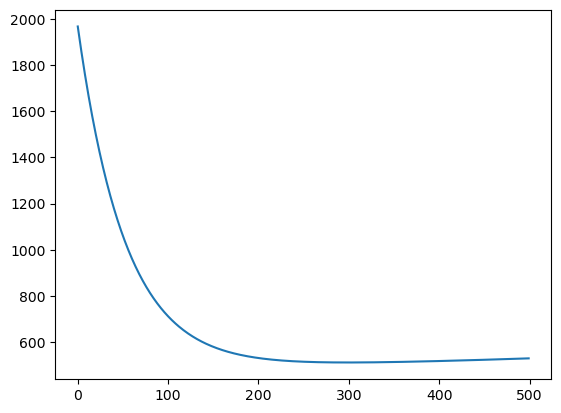

y = 2.405*x + 36.963


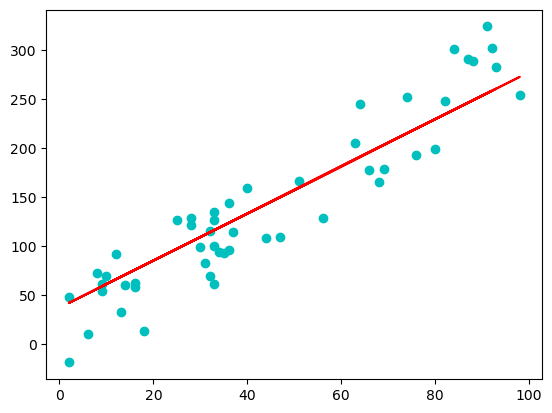

In [31]:
# 一元线性回归的简单示例，计算损失函数
import numpy as np
import matplotlib.pyplot as plt

x = [34, 82, 76, 14, 66, 30, 68, 13, 56, 64, 98, 80, 33, 36, 36, 92, 18, 37, 91, 33, 44, 32, 2, 16, 28, 35, 10, 47, 93,
     9, 9, 74, 84, 69, 33, 88, 33, 28, 31, 51, 32, 2, 6, 25, 12, 16, 87, 8, 63, 40]
y = [94, 248, 193, 60, 177, 99, 165, 33, 128, 245, 254, 199, 126, 96, 144, 302, 13, 114, 324, 61, 108, 115, 48, 58, 121,
     93, 69, 109, 283, 61, 54, 252, 301, 179, 135, 289, 100, 128, 83, 166, 69, -19, 10, 126, 92, 62, 291, 72, 205, 159]
x = np.array(x)  # 转换为ndarray数据类型
y = np.array(y)  # 转换为ndarray数据类型


def J(x, y, w, b):  # 代价函数
    m = len(x)  # 数量
    dif = w * x + b - y  # 真实值和预测值的差
    dif_2 = dif * dif  # 真实值和预测值的差的平方
    return np.sum(dif_2) / (2 * m)  # 真实值和预测值的差的平方和，再取平均值


def gradientDescent(x, y, w, b, alpha, iterations):  # 梯度下降
    m = len(x)  # 数量
    cost = []  # 保存代价函数求的值
    for i in range(iterations):
        w = w - alpha * (np.sum(w * x + b - y) / m)  # 梯度下降法更新w
        b = b - alpha * (np.sum((w * x + b - y) * x) / m)  # 梯度下降法更新b
        cost.append(J(x, y, w, b))  # 代价函数求的值存储到cost列表中
    return w, b, cost


# w和b先随便取一个值，通过梯度下降算法逐渐找到最接近的值
result = gradientDescent(x, y, 2, 1, 0.0001, 500)

plt.plot(np.arange(500), result[2])  # 折线图
plt.show()

print(f"y = {result[0]:.3f}*x + {result[1]:.3f}")
plt.plot(x, result[0] * x + result[1], color='r')  # 折线图
plt.scatter(x, y, color='c')  # 散点图
plt.show()

In [61]:
# loss = (WX + b - y)^2

def compute_error_for_line_given_points(b, w, points):
    total_error = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (w * x + b)) ** 2
    return total_error / float(len(points))


# delt(loss)/delt(w) = 2 * (wx + b -y) * x
# delt(loss)/delt(b) = 2 * (wx + b -y)
# 多个点点累加信息
def step_gradient(b_current, w_current, points, learning_rate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))  # 多少次
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((w_current * x) + b_current))
        w_gradient += -(2 / N) * x * (y - ((w_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_w = w_current - (learning_rate * w_gradient)
    return [new_b, new_w]


def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]


def run():
    points = np.genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0
    initial_w = 0
    num_iterations = 1000
    compute_error_for_line_given_points(initial_b, initial_w, points)

    print("Starting gradient descent at b = {0}, w = {1}, error = {2}".format(initial_b, initial_w,
                                                                              compute_error_for_line_given_points(
                                                                                  initial_b, initial_w, points)))
    print("Running...")
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)

    print("After {0} iterations b = {1}, w = {2}, error = {3}".format(num_iterations, b, w,
                                                                      compute_error_for_line_given_points(b, w,
                                                                                                          points)))


run()

Starting gradient descent at b = 0, w = 0, error = 21778.035714285714
Running...
After 1000 iterations b = 0.018595506863987386, w = 1.9998112195809332, error = 0.00015179249729354942


## MNIST

just function mapping
```
[28, 28]
X = [v1, v2, ..., v784]
X:[1, dx]
[28, 28] =>  [784] => [1, 784]

H1 = XW1+b1
W1:[d1,dx]
b1:[d1]

[1,784][d1, 784]^T + [d1] = [1, d1] + [d1] => [1,d1]

H2 = H1W2+b2
W2:[d2,d1]
b2:[d2]

[1,d1][d2,d1]^T + [d2] = [1, d2] + [d2] => [1,d2]

H3 = H2W3+b3
W3:[d3,d2]
b3:[d3]

[1,d2][d3,d2]^T + [d3] => [1,d3]


H3: [1, d3]

Y:
one-hot编码格式
1=> [0,1,0,0,0,0,0,0,0,0]
9=> [0,1,0,0,0,0,0,0,0,1]
```
使用欧式距离算法

in a nutshell

pred = `W3 * {W2[W1X + b1] + b2} + b3`

Non-linear Factor
加入非线性函数
sigmoid 激活函数
ReLU函数，小于一定阈值直接归零，大于后线性增长

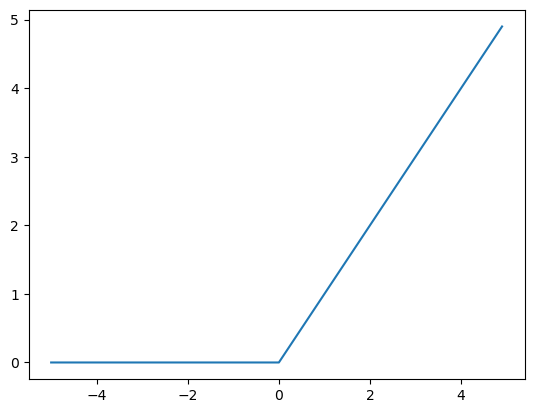

In [62]:
# Relu function
import numpy as np
import matplotlib.pyplot as plt


def relu(x):
    return np.maximum(0, x)


x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

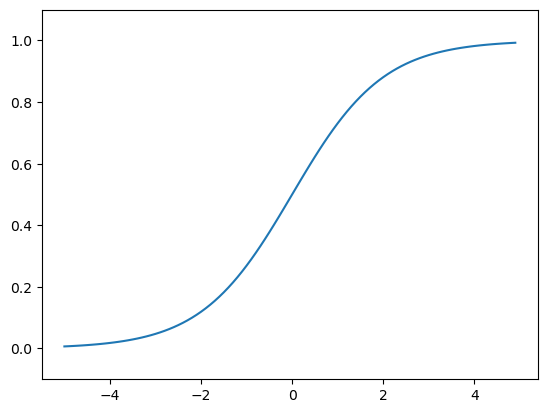

In [63]:
# sigmoid
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  #设置y轴范围
plt.show()

H1= relu(XW1 + b1)
H2= relu(XW2 + b2)
H3= relu(XW3 + b3)
引入ReLu函数，三个线性函数结合非线性函数
objective = (pred - Y)^2

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(0)


/var/folders/cv/x202h4n14tgbn7xg0b9rrn5h0000gn/T/ipykernel_34132/2077129576.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


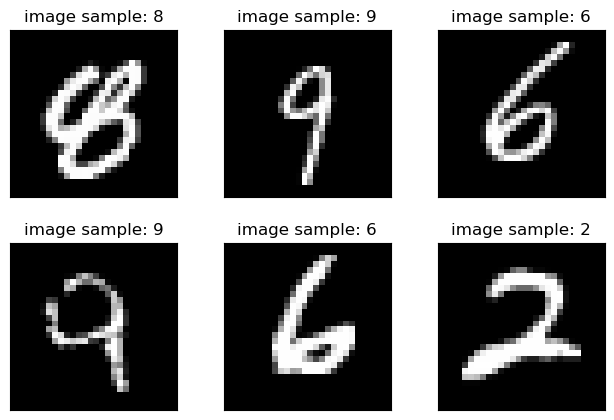

0 0 0.11443642526865005
0 10 0.0872684195637703
0 20 0.08125466108322144
0 30 0.07453341037034988
0 40 0.07145698368549347
0 50 0.06611235439777374
0 60 0.06387858092784882
0 70 0.06122415512800217
0 80 0.057621292769908905
0 90 0.053956471383571625
0 100 0.05380983278155327
0 110 0.0524684377014637
1 0 0.05076026916503906
1 10 0.048784367740154266
1 20 0.04524817690253258
1 30 0.04451467841863632
1 40 0.04220268875360489
1 50 0.042025305330753326
1 60 0.04468371719121933
1 70 0.04278615862131119
1 80 0.0396064855158329
1 90 0.03897620365023613
1 100 0.03859344869852066
1 110 0.03828122839331627
2 0 0.037580810487270355
2 10 0.03685053065419197
2 20 0.0370890274643898
2 30 0.035465508699417114
2 40 0.03637189418077469
2 50 0.03670387342572212
2 60 0.035337697714567184
2 70 0.03484048321843147
2 80 0.03387339413166046
2 90 0.031550176441669464
2 100 0.031225109472870827
2 110 0.03327683359384537


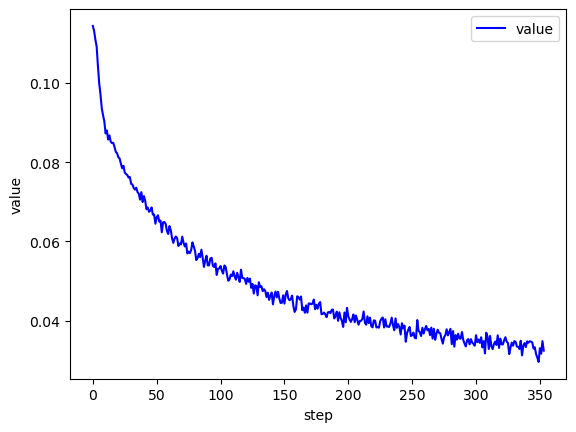

test acc 0.8877


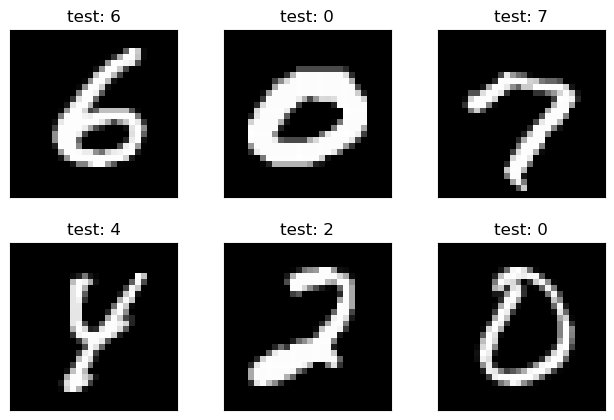

In [78]:
# 使用pytorch实现三层非线性网络

# H1= relu(XW1 + b1)
# H2= relu(XW2 + b2)
# H3= f(XW3 + b3) 一般第三层的输出不使用relu函数，而是使用自定义的函数

import torch


def plot_curve(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['value'], loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.show()


def plot_image(img, label, name):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.tight_layout()
        plt.imshow(img[i][0] * 0.3081 + 0.1307, cmap='gray', interpolation='none')
        plt.title("{}: {}".format(name, label[i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()


def one_hot(label, depth=10):
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1, 1)
    out.scatter_(dim=1, index=idx, value=1)
    return out


from torch import nn
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pyplot as plt

batch_size=512
# step1, load datasheet
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=torchvision.transforms.Compose(
        [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size,shuffle=True)


test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data/', train=False, download=True, transform=torchvision.transforms.Compose(
        [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size,shuffle=True)


x, y = next(iter(train_loader))

print(x.shape, y.shape, x.min(), y.min())

plot_image(x, y, 'image sample')

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        # xw_b
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        
        
    def forward(self, x):
        # x: [b, 1, 28, 28]
        # h1 = relu(xw1+b1)
        x = F.relu(self.fc1(x))
        # h2 = relu(h1w2+b2)
        x = F.relu(self.fc2(x))
        # h2 = h2w3+b3
        x = self.fc3(x)
        
        return x     


net = Net()
# [w1, b1, w2, b2, w3, b3]
optimizer = optim.SGD(net.parameters(),lr=0.01, momentum=0.9 )

train_loss = []
for epoch in range(3):
    for batch_idx, (x, y) in enumerate(train_loader):
        # x: [b,1,28,28], y: [512]
        # [b,1,28,28] => [b, feature]
        x = x.view(x.size(0), 28*28)
        # => [b,10]
        out = net(x)
        # [b, 10]
        y_onehot = one_hot(y)
        # loss = mse(out, y onehot)
        loss = F.mse_loss(out, y_onehot)
        
        optimizer.zero_grad()
        loss.backward()
        # w` = w - lr*grad
        optimizer.step()
        
        train_loss.append(loss.item())
        
        if batch_idx %10 == 0:
            print(epoch, batch_idx, loss.item())
plot_curve(train_loss)

# get optimal [w1,b1,w2,b2,w3,b3]
total_correct = 0
for x, y in test_loader:
    x = x.view(x.size(0), 28*28)
    out = net(x)
    # out: [b, 10] => pred: [b]
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct
  
total_num = len(test_loader.dataset)
acc = total_correct/ total_num
print('test acc', acc)

x, y = next(iter(test_loader))
out = net(x.view(x.size(0), 28*28))
pred = out.argmax(dim=1)
plot_image(x, pred, 'test')